Okay, before getting started. Let's understand what is Airbnb?

Looks Airbnb has interesting breakdown with names likely: Air, Bed and Breakfast to become Airbnb. Wow! This San-Francisco based startup it has online community marketplace for people to list, discover, and book accommodations through mobile phones or the internet basically it acts as an intermediary between people who wants to rent their place and those who want that space for someday. The interesting fact is Airbnb does not own any of these property (WoW)  

Well, enough of it we understood what is the data all about and where it came from.

Here we have Airbnb's dataset from New York City this dataset contains basic information like name,neighbourhood,price,room_type and many more interesting attributes, so our task is to clean and get interesting facts and insights from this dataset.

Lets deep dive!

##### importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pt
import folium
from folium.plugins import FastMarkerCluster

##### loading dataset 

In [2]:
data=pd.read_csv('/home/parth/Desktop/ABB_NYC_2019.csv')  
data.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

## Data Exploration and Identifying Variables

In [3]:
data.dtypes  # data types 

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [4]:
data[['price','number_of_reviews']].describe()

price  number_of_reviews
count  48895.000000       48895.000000
mean     152.720687          23.274466
std      240.154170          44.550582
min        0.000000           0.000000
25%       69.000000           1.000000
50%      106.000000           5.000000
75%      175.000000          24.000000
max    10000.000000         629.000000

In [5]:
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [6]:
# renaming columns to make them easily readable and understandable
data.rename(columns={'calculated_host_listings_count':'listings_per_host','availability_365':'days_available_annually'},inplace=True)

In [7]:
# checking shape of dataset it has 48895 rows and 16 columns
data.shape

(48895, 16)

In [42]:
data['host_id'].nunique()

37457

In [8]:
# checking number of null values in our dataset
data.isnull().sum()

id                             0
name                          16
host_id                        0
host_name                     21
neighbourhood_group            0
neighbourhood                  0
latitude                       0
longitude                      0
room_type                      0
price                          0
minimum_nights                 0
number_of_reviews              0
last_review                10052
reviews_per_month          10052
listings_per_host              0
days_available_annually        0
dtype: int64

#### OOPS we got some null values, lets fix them :) 

In [9]:
# we have null values in name column so we'll replace that with Airbnb name not available
data['name'].fillna('Airbnb name not available',inplace=True)

# we have null values in name column so we'll replace that with Hostname name not available
data['host_name'].fillna('Host name not available',inplace=True)

# replacing na values with 0 in last_review and reviews per month colums
data['last_review'].replace(np.nan,0,inplace=True)
data['reviews_per_month'].replace(np.nan,0,inplace=True)

## Let's Analyse :) 

In [10]:
# no of listings by each neighbourhood_group
data['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

<AxesSubplot:xlabel='neighbourhood_group', ylabel='Count'>

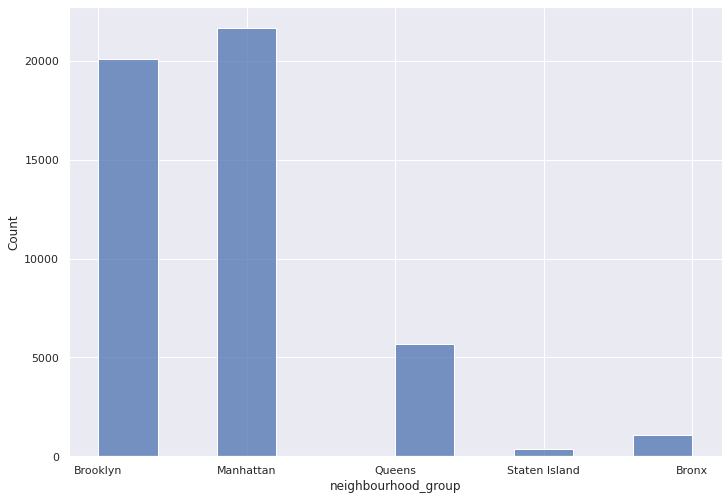

In [11]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(data,x='neighbourhood_group',binwidth=0.4,discrete=False)

In [12]:
# finding costliest house listed on Airbnb New York City
data.sort_values(by='price',ascending=False)

id                                               name    host_id  \
9151    7003697                Furnished room in Astoria apartment   20582832   
17692  13894339    Luxury 1 bedroom apt. -stunning Manhattan views    5143901   
29238  22436899                                1-BR Lincoln Center   72390391   
40433  31340283  2br - The Heart of NYC: Manhattans Lower East ...    4382127   
12342   9528920                Quiet, Clean, Lit @ LES & Chinatown    3906464   
...         ...                                                ...        ...   
25778  20624541      Modern apartment in the heart of Williamsburg   10132166   
25796  20639914       Cozy yet spacious private brownstone bedroom   86327101   
25433  20333471      ★Hostel Style Room | Ideal Traveling Buddies★  131697576   
26841  21291569  Coliving in Brooklyn! Modern design / Shared room  101970559   
25795  20639792  Contemporary bedroom in brownstone with nice view   86327101   

      host_name neighbourhood_group       neighbourhood  latitude  longitude  \
9151   Kathrine              Queens             Astoria  40.76810  -73.91651   
17692      Erin            Brooklyn          Greenpoint  40.73260  -73.95739   
29238    Jelena           Manhattan     Upper West Side  40.77213  -73.98665   
40433      Matt           Manhattan     Lower East Side  40.71980  -73.98566   
12342       Amy           Manhattan     Lower East Side  40.71355  -73.98507   
...         ...                 ...                 ...       ...        ...   
25778   Aymeric            Brooklyn        Williamsburg  40.70838  -73.94645   
25796   Adeyemi            Brooklyn  Bedford-Stuyvesant  40.68258  -73.91284   
25433    Anisha               Bronx     East Morrisania  40.83296  -73.88668   
26841    Sergii            Brooklyn            Bushwick  40.69211  -73.90670   
25795   Adeyemi            Brooklyn  Bedford-Stuyvesant  40.68279  -73.91170   

             room_type  price  minimum_nights  number_of_reviews last_review  \
9151      Private room  10000             100                  2  2016-02-13   
17692  Entire home/apt  10000               5                  5  2017-07-27   
29238  Entire home/apt  10000              30                  0           0   
40433  Entire home/apt   9999              30                  0           0   
12342     Private room   9999              99                  6  2016-01-01   
...                ...    ...             ...                ...         ...   
25778  Entire home/apt      0               5                  3  2018-01-02   
25796     Private room      0               1                 95  2019-06-23   
25433     Private room      0               2                 55  2019-06-24   
26841      Shared room      0              30                  2  2019-06-22   
25795     Private room      0               1                 95  2019-06-21   

       reviews_per_month  listings_per_host  days_available_annually  
9151                0.04                  1                        0  
17692               0.16                  1                        0  
29238               0.00                  1                       83  
40433               0.00                  1                      365  
12342               0.14                  1                       83  
...                  ...                ...                      ...  
25778               0.15                  1                       73  
25796               4.35                  6                      222  
25433               2.56                  4                      127  
26841               0.11                  6                      333  
25795               4.37                  6                      232  

[48895 rows x 16 columns]

In [13]:
#host_id with most listings
grouped=data.groupby(['host_name','neighbourhood_group'])['listings_per_host'].sum().reset_index()
grouped.sort_values('listings_per_host', ascending=False)

host_name neighbourhood_group  listings_per_host
13221    Sonder (NYC)           Manhattan             106929
1834       Blueground           Manhattan              53360
7279             Kara           Manhattan              14669
6544   Jeremy & Laura           Manhattan               9216
13220          Sonder           Manhattan               9216
...               ...                 ...                ...
6377             Jazz            Brooklyn                  1
6380            Jazzy              Queens                  1
6381               Jb           Manhattan                  1
6383               Jc              Queens                  1
15346              현선           Manhattan                  1

[15347 rows x 3 columns]

we can observe that Sonder have most no of listings in NYC's Manhattan's neighbourhood and all the top 5
listings are from Manhattan 

### Listings

In [14]:
lats = data['latitude'].tolist()
lons = data['longitude'].tolist()
locations = list(zip(lats, lons))

map1 = folium.Map(location=[40.7128, 74.0060],zoom_start=1)
FastMarkerCluster(data=locations).add_to(map1)
map1

### Finding outliers

#### So what is Outlier? 
     An outlier is an observation which lies far away from other observations.
#### Are outliers useless?
     No, Outliers are not always useless data which must be removed from our dataset. They are sometimes valuable They may contain a lot of information which may help us in our analysis.

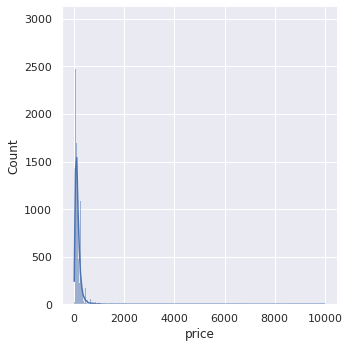

In [15]:
sns.set(rc={'figure.figsize':(20,20)})
sns.displot(data,x='price',kde=True)

#### From above plot we can say that it is positively skewed

<AxesSubplot:xlabel='minimum_nights', ylabel='price'>

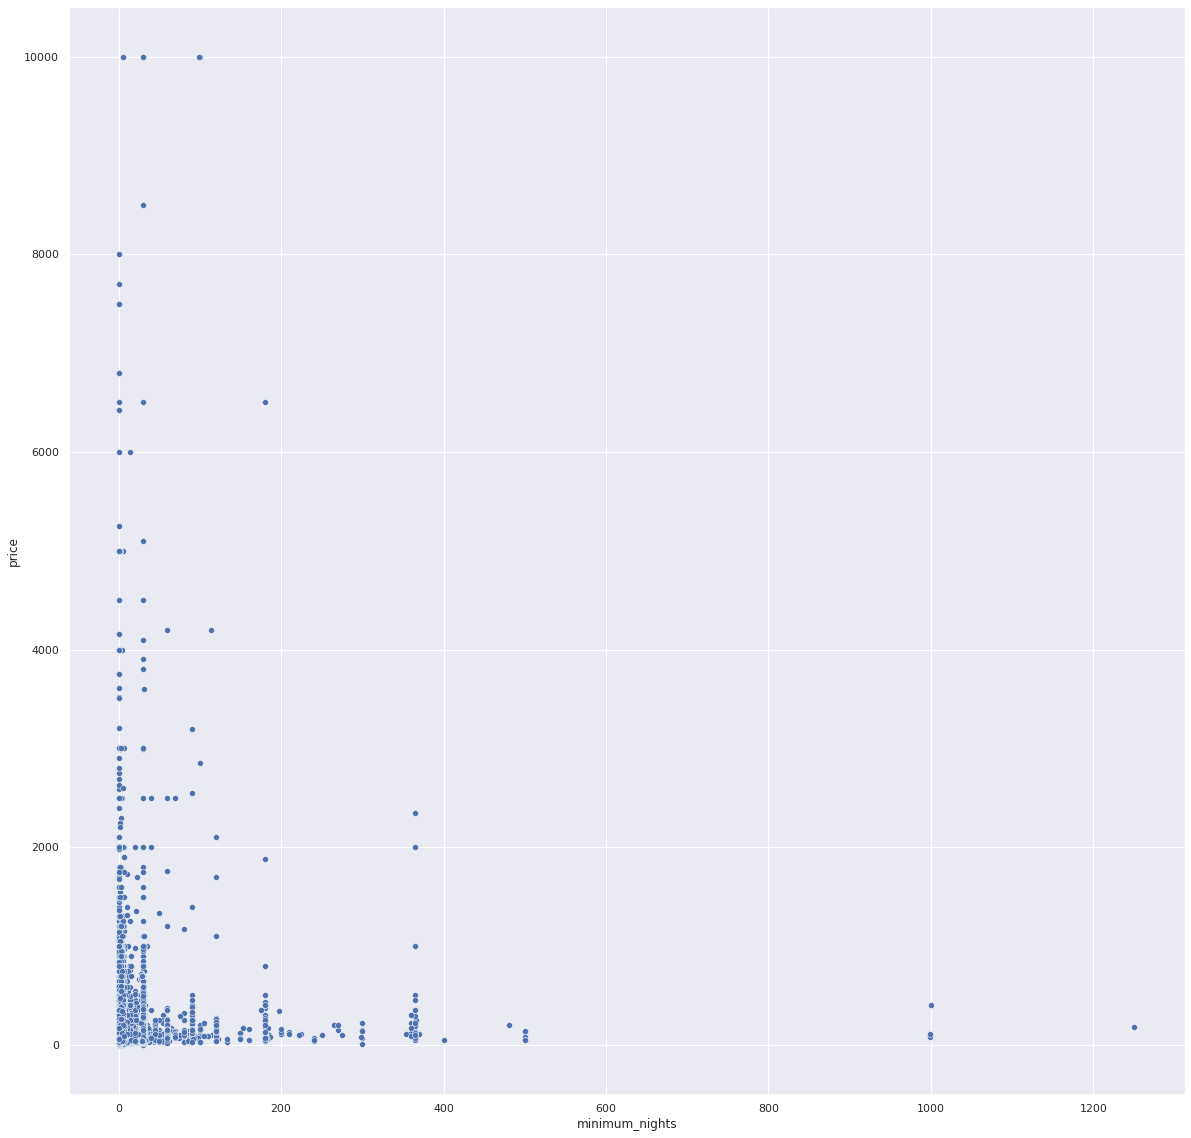

In [16]:
sns.scatterplot(x=data['minimum_nights'],y=data['price'])

#### From above scatter plot we can say that most of data points are clustered at price 0 and at 0 night stays (see we have outliers)

In [17]:
print("Skewness: %f" % data['price'].skew())
print("Kurtosis: %f" % data['price'].kurt())

Skewness: 19.118939
Kurtosis: 585.672879


 from above plots we can see that data is skewed and kurtosis is high too and have good numbers of outliers in our dataset

In [18]:
# host with no of lisiting ( try to make this in columns)
data['host_id'].value_counts()

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
            ... 
1641589        1
4070519        1
208106618      1
235939247      1
1288080        1
Name: host_id, Length: 37457, dtype: int64

In [19]:
#reviews by neighbourhood_group
data.groupby('neighbourhood_group')['number_of_reviews'].mean()

neighbourhood_group
Bronx            26.004583
Brooklyn         24.202845
Manhattan        20.985596
Queens           27.700318
Staten Island    30.941019
Name: number_of_reviews, dtype: float64

In [20]:
data['days_available_annually'].mean()

112.78132733408324

In [21]:
# days available by neighbourhood_group
data.groupby('neighbourhood_group')['days_available_annually'].mean()

neighbourhood_group
Bronx            165.758937
Brooklyn         100.232292
Manhattan        111.979410
Queens           144.451818
Staten Island    199.678284
Name: days_available_annually, dtype: float64

Text(0.5, 1.0, 'Top neighbourhoods in entire NYC on the basis of count of listings')

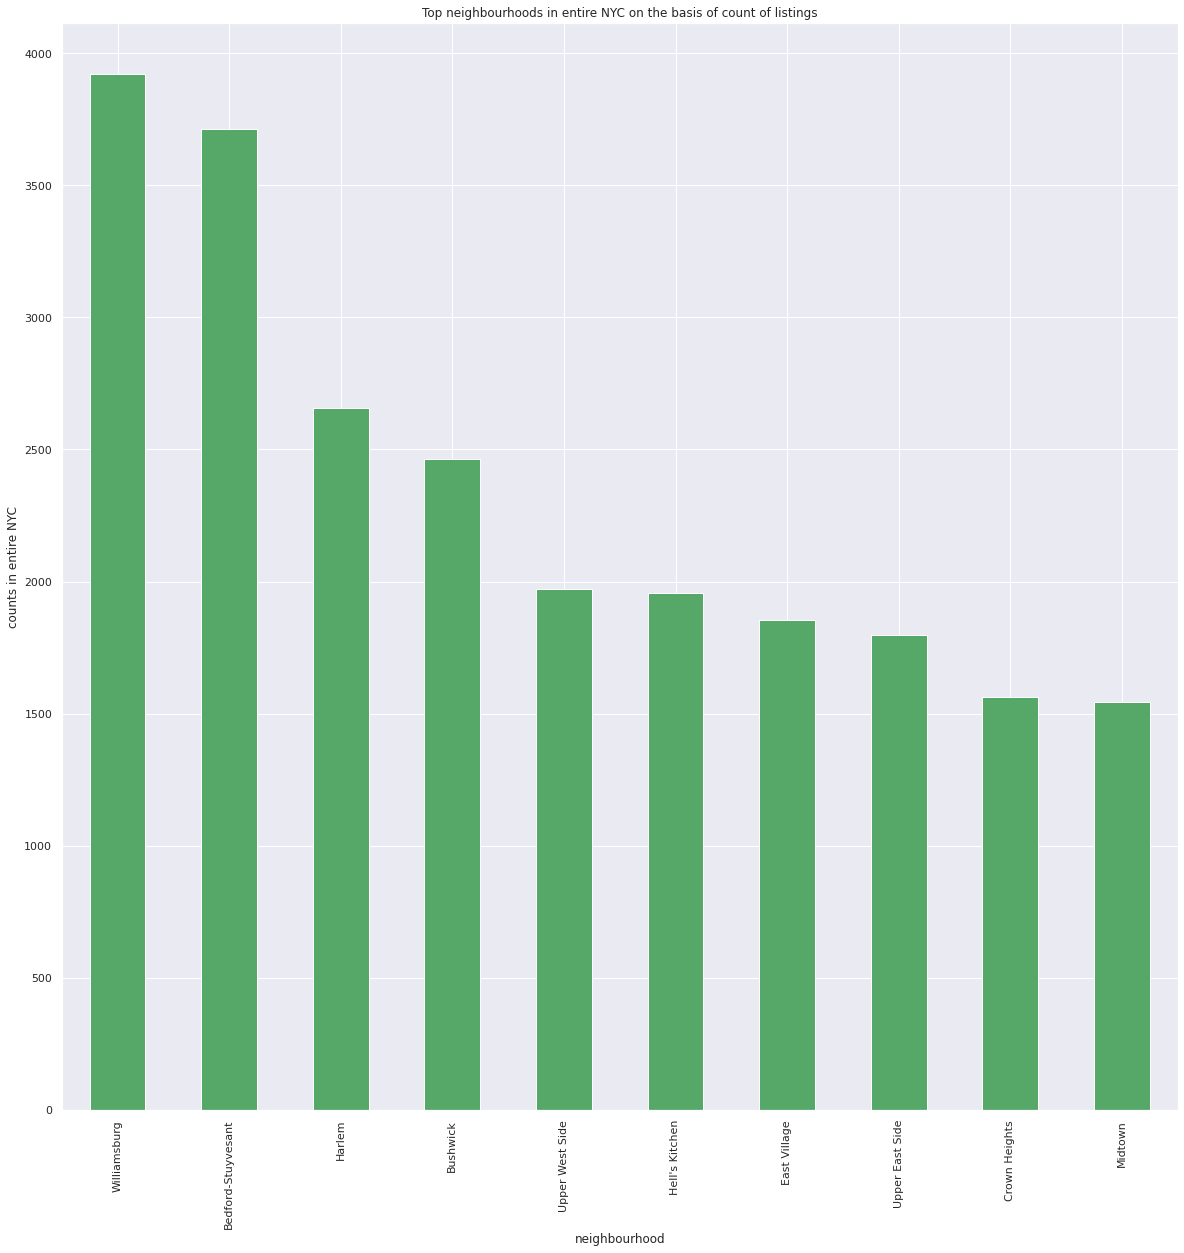

In [22]:
# checking out top 10 neighbourbood in NYC on basis of no of rooms 
top_10_neigbours= data['neighbourhood'].value_counts()[:10] 
top_10_neigbours.plot(kind='bar',color='g')
plt.xlabel('neighbourhood')
plt.ylabel('counts in entire NYC')
plt.title('Top neighbourhoods in entire NYC on the basis of count of listings')

### Removing Outliers

In [23]:
 # making a copy of data so that we don't make changes on original data and can work on new dataset
outlier_removal=data.copy()

#### What is Inter-Quantile Range?
    The range is the distance from the highest value to the lowest value. The Inter-Quartile Range is quite literally just the range of the quartiles: the distance from the largest quartile to the smallest quartile, which is IQR=Q3-Q1.
   

In [24]:
# using InterQuartile Range (IQR) for removing outliers 
Q1= data.price.quantile(0.25)
Q3= data.price.quantile(0.75) 
IQR=Q3-Q1
print(IQR)

106.0


In [25]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
lower_limit,upper_limit

(-90.0, 334.0)

In [26]:
outlier_removal[(outlier_removal.price < lower_limit) | (outlier_removal.price > upper_limit)]

id                                               name    host_id  \
61        15396                 Sunny & Spacious Chelsea Apartment      60278   
85        19601                perfect for a family or small group      74303   
103       23686  2000 SF 3br 2bath West Village private  townhouse      93790   
114       26933  2 BR / 2 Bath Duplex Apt with patio! East Village      72062   
121       27659                   3 Story Town House in Park Slope     119588   
...         ...                                                ...        ...   
48758  36420289    Rustic Garden House Apt, 2 stops from Manhattan   73211393   
48833  36450896   Brand New 3-Bed Apt in the Best Location of FiDi   29741813   
48839  36452721  Massage Spa. Stay overnight. Authors Artist dr...  274079964   
48842  36453160  LUXURY MANHATTAN PENTHOUSE+HUDSON RIVER+EMPIRE...  224171371   
48856  36457700  Large 3 bed, 2 bath , garden , bbq , all you need   66993395   

                     host_name neighbourhood_group       neighbourhood  \
61                       Petra           Manhattan             Chelsea   
85                      Maggie            Brooklyn    Brooklyn Heights   
103                        Ann           Manhattan        West Village   
114                      Bruce           Manhattan        East Village   
121                       Vero            Brooklyn         South Slope   
...                        ...                 ...                 ...   
48758                LaGabrell              Queens    Long Island City   
48833                      Yue           Manhattan  Financial District   
48839                  Richard            Brooklyn      Sheepshead Bay   
48842  LuxuryApartmentsByAmber           Manhattan             Chelsea   
48856                   Thomas            Brooklyn  Bedford-Stuyvesant   

       latitude  longitude        room_type  price  minimum_nights  \
61     40.74623  -73.99530  Entire home/apt    375             180   
85     40.69723  -73.99268  Entire home/apt    800               1   
103    40.73096  -74.00319  Entire home/apt    500               4   
114    40.72540  -73.98157  Entire home/apt    350               2   
121    40.66499  -73.97925  Entire home/apt    400               2   
...         ...        ...              ...    ...             ...   
48758  40.75508  -73.93258  Entire home/apt    350               2   
48833  40.70605  -74.01042  Entire home/apt    475               2   
48839  40.59866  -73.95661     Private room    800               1   
48842  40.75204  -74.00292  Entire home/apt    350               1   
48856  40.68886  -73.92879  Entire home/apt    345               4   

       number_of_reviews last_review  reviews_per_month  listings_per_host  \
61                     5  2018-11-03               0.12                  1   
85                    25  2016-08-04               0.24                  1   
103                   46  2019-05-18               0.55                  2   
114                    7  2017-08-09               0.06                  4   
121                   16  2018-12-30               0.24                  2   
...                  ...         ...                ...                ...   
48758                  0           0               0.00                  1   
48833                  0           0               0.00                  1   
48839                  0           0               0.00                  1   
48842                  0           0               0.00                  1   
48856                  0           0               0.00                  3   

       days_available_annually  
61                         180  
85                           7  
103                        243  
114                        298  
121                        216  
...                        ...  
48758                      364  
48833                       64  
48839                       23  
48842                        9  
48856     

In [27]:
# so we remove all prices which are less than lower limit and higher than upper limit 
no_outlier=outlier_removal[(outlier_removal.price > lower_limit) & (outlier_removal.price < upper_limit)]
no_outlier.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0           0   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  listings_per_host  days_available_annually  
0               0.21                  6                      365  
1               0.38                  2                      355  
2               0.00                  1                      365  
3               4.64                  1                      194  
4               0.10                  1                        0

In [28]:
no_outlier.shape

(45918, 16)

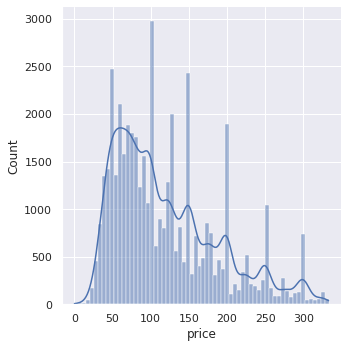

In [29]:
# now we have removed outliers 
sns.displot(no_outlier,x='price',kde=True)

### Lets get insights from room_types 

In [30]:
no_outlier['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [31]:
# price by room_type
no_outlier.groupby('room_type')['price'].mean()
# from this we can infer that renting a entire home/apt is expensive in New York City

room_type
Entire home/apt    162.489466
Private room        79.018503
Shared room         59.293497
Name: price, dtype: float64

In [32]:
# Average price of Airbnbs in the 5 boroughs of New York City depending on the room type
pivot=no_outlier.pivot_table(index='neighbourhood_group',columns='room_type',values='price',aggfunc='mean')
pivot

room_type            Entire home/apt  Private room  Shared room
neighbourhood_group                                            
Bronx                     112.195592     60.595679    47.254237
Brooklyn                  148.202080     70.283443    48.036496
Manhattan                 181.621136     98.057700    75.939785
Queens                    131.328388     65.732319    46.989691
Staten Island             121.089286     62.292553    57.444444

In [33]:
# Types of room based on neighbourhood_group
pt.bar(pivot,barmode='group')

In [37]:
### avg days of availability of rooms in nyc by neighbourhood_groups
no_outlier.groupby('neighbourhood_group')['days_available_annually'].mean()

neighbourhood_group
Bronx            164.564486
Brooklyn          98.500644
Manhattan        105.837701
Queens           143.019041
Staten Island    199.893151
Name: days_available_annually, dtype: float64

In [38]:
no_outlier['neighbourhood_group'].value_counts()

Manhattan        19501
Brooklyn         19415
Queens            5567
Bronx             1070
Staten Island      365
Name: neighbourhood_group, dtype: int64

Instead of checking distributions for each categories one by one we can simply do a violin plot for getting the overall statistics for each groups. But we'll get to know the median of price/neighbourhood group. <br>

We can do a seaborn point plot to get the average prices/neighbourhood in NYC! 

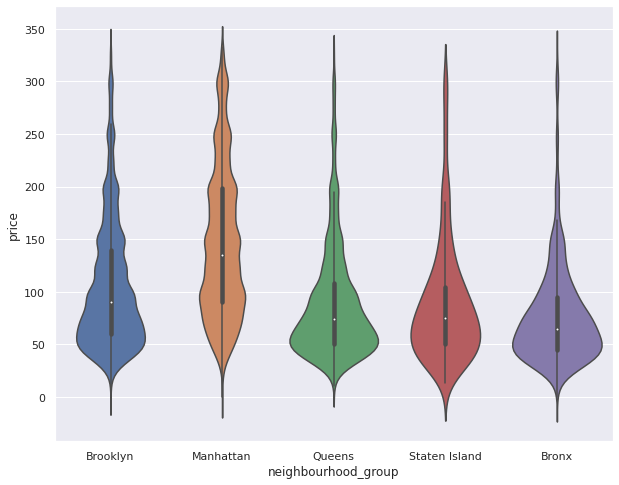

In [39]:
ax= sns.violinplot(x='neighbourhood_group',y='price',data=no_outlier)

**Lets look how review varies on types of room**

Text(0.5, 1.0, 'Most Reviewed room_types in each Neighbourhood Groups')

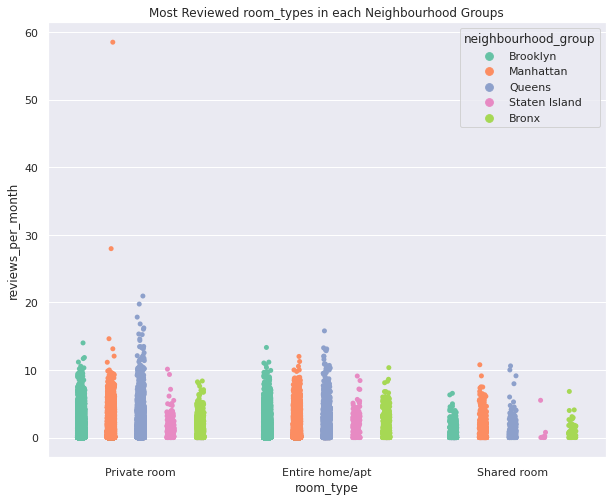

In [40]:
f,ax = plt.subplots(figsize=(10,8))
ax= sns.stripplot(x='room_type',y='reviews_per_month',hue='neighbourhood_group',dodge=True,data=no_outlier,palette='Set2')
ax.set_title('Most Reviewed room_types in each Neighbourhood Groups')

We can see that **Private room** recieved the most no of reviews/month where **Manhattan** had the highest reviews received for Private rooms with more than 50 reviews/month, followed by **Manhattan** in the chase. <br>

Manhattan & Queens got the most no of reviews for Entire home/apt room type. <br>

There were less reviews recieved from **shared rooms** as compared to other room types and it was from **Staten Island** followed by **Bronx**.

### Lets work on Latitude and Longitude

Text(0.5, 1.0, 'Location Co-ordinates')

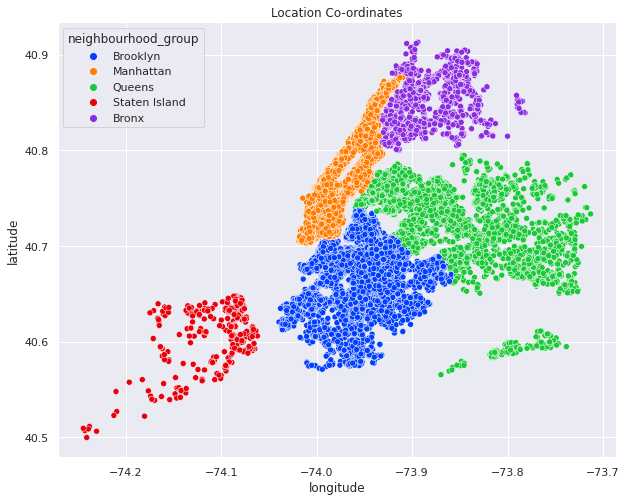

In [34]:
sns.set(rc={"figure.figsize": (10, 8)})
ax= sns.scatterplot(data=no_outlier, x="longitude", y="latitude",hue='neighbourhood_group',palette='bright')
ax.set_title('Location Co-ordinates')


Text(0.5, 1.0, 'Location Co-ordinates')

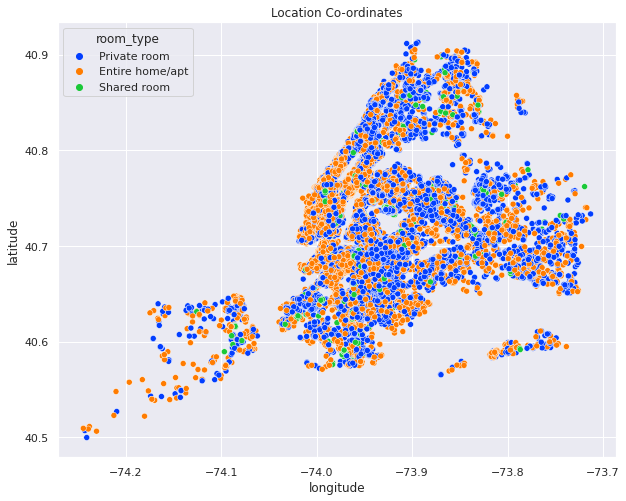

In [35]:
sns.set(rc={"figure.figsize": (10, 8)})
ax= sns.scatterplot(data=no_outlier, x="longitude", y="latitude",hue='room_type',palette='bright')
ax.set_title('Location Co-ordinates')

From above scatter plot and using Latitude and Longitude we can infer there's is very less number of shared room throughout NYC as compared to private and Entire home/apt.

More than 90% of the listings on Airbnb are either Private room or Entire/home apt. Very few guests had opted for shared rooms on Airbnb.

Also, guests mostly prefer this room types when they are looking for a rent on Airbnb as we found out previously in our analysis.

##### Price variation across New York City with help of latitude and longitude

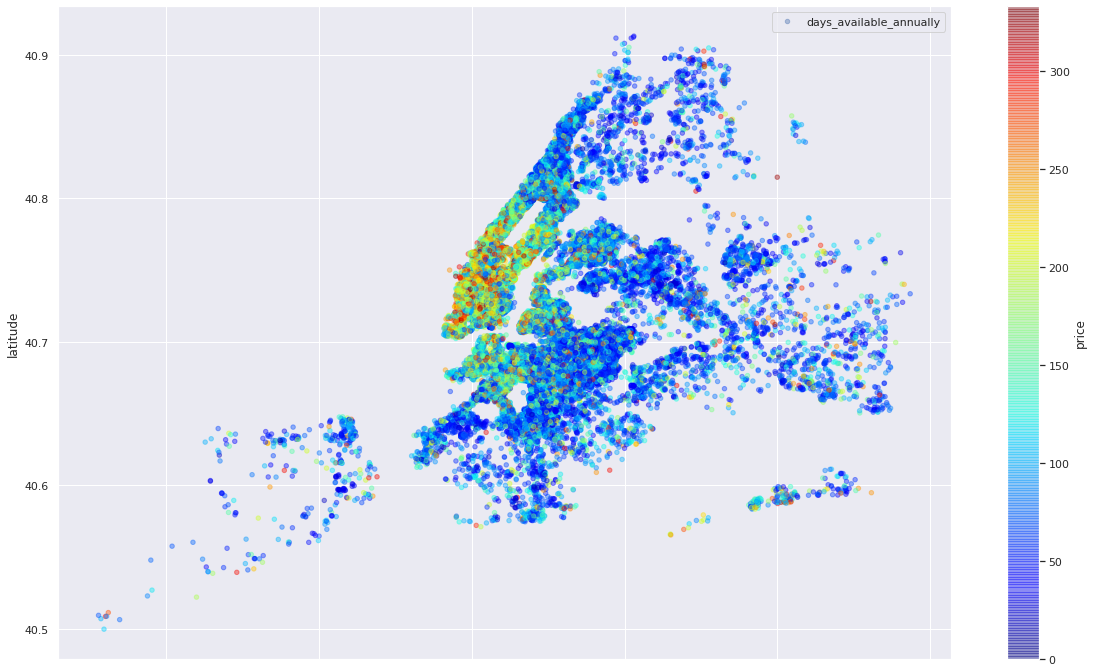

In [36]:
nyc_price=no_outlier.plot(kind='scatter', x='longitude', y='latitude', label='days_available_annually', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(20,12))
nyc_price.legend()

**From above plot we can infer that Manhatten is the most expensive Neighbourhood in New York City**

I've reached almost the end of the analysis. There might be few analysis which can be done more but we analyzed boroughs and neighborhood listing densities and what areas were more popular than another, their price variations, their availability as per room types.

- We analysed price and extracted information about the neighbourhoods in New York City and can conclude that Manhatten is the most expensive neighbourhood to rent an property/room.


- We also saw that mostly "Entire Home/apt" is the most common room type available and there are less no of shared room available in New York City.


- we can observe that Sonder have most no of listings in NYC's Manhattan's neighbourhood and all the top 5 listings are from Manhattan.


- More than 35000+ People have listed their house/apt/Property on Airbnb.


In [43]:
# This Notebook is Contributed by Ayush Patel